# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

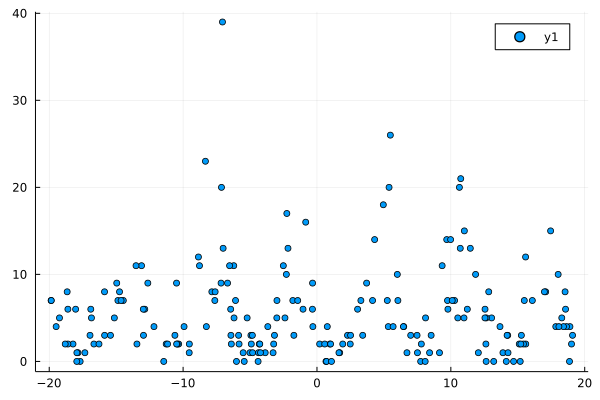

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -523.870280984646
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.941346 seconds (6.85 M allocations: 416.672 MiB, 2.77% gc time, 98.06% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3951428569695248, 0.5127973501833774, 0.3277645512376661, 0.5106924852577753, 0.22493302443791088, 0.2973695969282604, 0.3446996820608265, 0.45376617738822816, 0.5582788869410721, 0.22221805306470377  …  0.4224999583092062, 0.3375853345777221, 0.39057722279944923, 0.223913892642374, 0.2387202026541932, 0.4954575712162499, 0.28496989144336066, 0.22928544311684573, 0.23907352039842353, 0.5310915531128196], θ = [5.429536799492683, 2.935943627205306, 5.451284712392027, 5.8729101563239166, 6.472732399615899, 4.467129881598375, 7.426610703555286, 8.848687021115117, 3.4118413704930326, 3.983620590483055  …  4.434233886476591, 2.9718300278402987, 4.44365295885193, 4.4812922534958854, 3.483472871230112, 5.880200848553825, 3.476505158385902, 3.982567700885359, 7.46448040989307, 11.237106825247949]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -671.9469080099786
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.042586 seconds (4.31 M allocations: 300.916 MiB, 3.05% gc time, 96.09% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 12.079253982140953) infered by Analytic Variational Inference , (local_vars = (c = [0.3948285503526667, 0.6703725734653516, 0.3054790717939317, 0.5554470608586283, 0.31845783156000246, 0.40906359490423366, 0.3228048917547424, 0.48424623061952926, 0.7136369205254621, 0.17672494392674593  …  0.5512924019240557, 0.4588724061828823, 0.3868057172377584, 0.17695557405846357, 0.3098922041217661, 0.5615297811031494, 0.24892353708587475, 0.1974328052757085, 0.19082728583191155, 0.5836113417762189], θ = [5.4007401700249345, 4.299037879391924, 5.607633983170018, 5.580434766354006, 7.344813603826369, 5.450886671160098, 7.5132696136191095, 8.653838583906172, 4.80339560504418, 4.390585252190811  …  5.614564963499235, 4.044320993632363, 4.423516341520849, 4.897155853605173, 4.314928588443691, 5.57396521396188, 3.7729900334030124, 4.46777953214228, 7.8462063542067275, 10.884313208028049], γ = [4.94143697112255, 7.917687018042565, 5.302347652

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

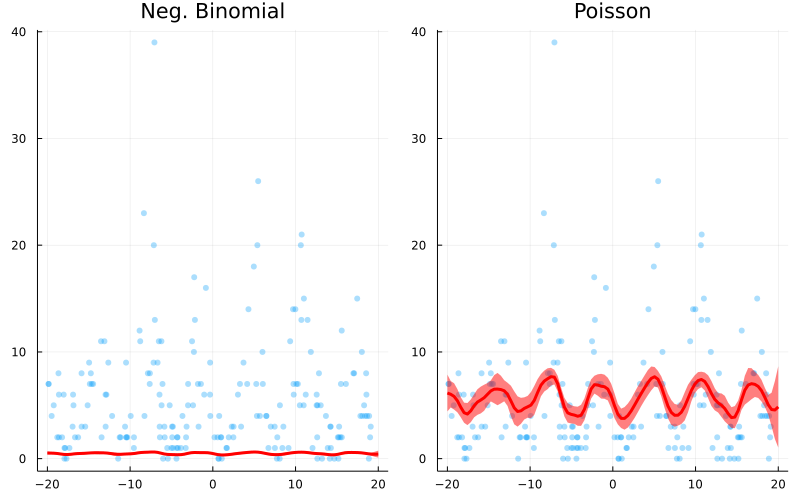

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*